In [1]:
from os import listdir
from os.path import isfile, join
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

In [2]:
img = cv2.imread('./excerpt/eximg/img_0001.jpg')
height, width, channels = img.shape
size = (int(width), int(height))
crop=0.5

In [3]:
distCoeff = np.array([[-2.57614e-01, 8.7708699e-02, -2.56970803e-04, -5.933904e-04, -0.52194e-04 ]])
intrinsic_matrix = np.array([[ 857.483, 0, 968.06],[0, 876.7182, 556.371],[0,0,1]])

newMat, ROI = cv2.getOptimalNewCameraMatrix(intrinsic_matrix,
                                            distCoeff, size,
                                            alpha = crop,
                                            centerPrincipalPoint = 1)
mapx, mapy = cv2.initUndistortRectifyMap(intrinsic_matrix,
                                         distCoeff,
                                         None,
                                         newMat,
                                         size,
                                         m1type = cv2.CV_32FC1)

In [4]:
def proc_img(img, x_start=480):
    # we crop to a 4:3 aspect ratio
    
    height, width, channels = img.shape
    
    img_out = cv2.remap(img, mapx, mapy, cv2.INTER_LINEAR)[:,480:,:]
    
    return img_out

In [5]:
data_dir = './excerpt/eximg/'
data_dir_out = './excerpt/eximg_ud/'
files = listdir(data_dir)

for i, file in enumerate(tqdm(files)):
    img = cv2.imread(data_dir+file)
    try:
        img_out = proc_img(img)
        img_out_name = data_dir_out + file[:-4] + '_ud.jpg'
        cv2.imwrite(img_out_name, img_out)
    except:
        pass

100%|██████████| 1001/1001 [01:10<00:00, 15.78it/s]


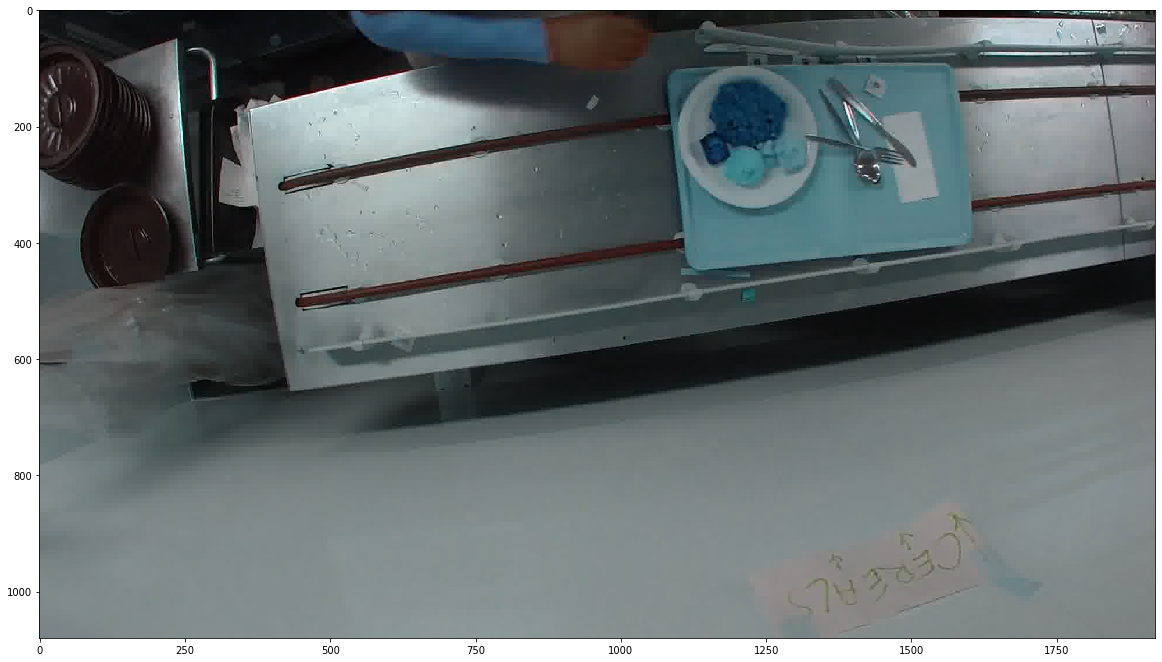

In [6]:
plt.figure(figsize=(20,20))
plt.imshow(img)